In [1]:
! pip install yfinance
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt

# Get data from yahoo finance
sd = dt.datetime(1998,12,4)
ed = dt.datetime(2023,2,23)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
# 2x leveraged nasdaq 100 etf
qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD', sd, ed)
# 3x leveraged nasdaq 100 etf
tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ', sd, ed)
#nasdaq 100 index
ndx = ab.StockData('NDX')
ndx.get_data_from_yfinance('NDX', sd, ed)
#S&P 500 etf
spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY', sd, ed)
#nasdaq stocks above 200 day moving average percentage
naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
#buy and hold strategy vs various  strategies
def backtestAll(ticker:ab.StockData,test_start:dt.datetime,test_end:dt.datetime):
    buy_and_hold = ab.BuyAndHold() 
    buy_and_hold.run_strategy(ticker, test_start,test_end)
    bt = ab.BackTest(test_start, test_end)
    bt.run_backtest(buy_and_hold, ticker)

    macross_strategy = ab.MACross(50, 200)
    macross_strategy.run_strategy(ticker, test_start ,test_end)
    ma_cross_bt = ab.BackTest(test_start, test_end)
    ma_cross_bt.run_backtest(macross_strategy, ticker)

    threshold_strategy = ab.Threshold(signal_data = naa200r, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
    threshold_strategy.run_strategy(ticker, test_start , test_end)
    naa200r_threshold_bt = ab.BackTest(test_start , test_end)
    naa200r_threshold_bt.run_backtest(threshold_strategy, ticker)

    ma_threshold = ab.MAThreshold(ma_window = 200, buy_threshold = 1.05, sell_threshold = 0.95)
    ma_threshold.run_strategy(ticker, test_start,test_end)
    ma_threshold_bt = ab.BackTest(test_start, test_end)
    ma_threshold_bt.run_backtest(ma_threshold, ticker)

    ma_threshold2 = ab.MAThreshold(ma_window = 200, buy_threshold = 1.03, sell_threshold = 0.95)
    ma_threshold2.run_strategy(ticker, test_start,test_end)
    ma_threshold2_bt = ab.BackTest(test_start, test_end)
    ma_threshold2_bt.run_backtest(ma_threshold2, ticker)
    
    WeeklyMAThreshold = ab.WeeklyMAThreshold(ma_window =40,buy_threshold=1,sell_threshold=1)
    WeeklyMAThreshold.run_strategy(ticker, test_start , test_end)
    WeeklyMAThreshold_bt = ab.BackTest(test_start , test_end)
    WeeklyMAThreshold_bt.run_backtest(WeeklyMAThreshold, ticker)

    print('Backtest for', ticker.ticker)
    bt.performance_summary('Buy and Hold')
    ma_cross_bt.performance_summary('MA Crossing, 50, 200')
    naa200r_threshold_bt.performance_summary('NAA200R, 15, 30')
    ma_threshold_bt.performance_summary('Price to SMA 200, 5% BUY, -5% SELL')
    ma_threshold2_bt.performance_summary('Price to SMA 200, 3% BUY, -5% SELL')
    WeeklyMAThreshold_bt.performance_summary('Weekley Price to SMA 200, 2w higher BUY, 2w lower SELL')
    
    plt.plot(bt.balance['Date'], bt.balance['Total'], label = 'Buy and Hold',color = 'blue')
    plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'], label = 'Moving Average Cross', color = 'red')
    plt.plot(naa200r_threshold_bt.balance['Date'], naa200r_threshold_bt.balance['Total'], label = 'NAA200R', color = 'green')
    plt.plot(ma_threshold_bt.balance['Date'], ma_threshold_bt.balance['Total'], label = 'Price to SMA200, 5% Buy, -5% Sell')
    plt.plot(ma_threshold2_bt.balance['Date'], ma_threshold2_bt.balance['Total'], label = 'Price to SMA200, 3% Buy, -5% Sell')
    plt.plot(WeeklyMAThreshold_bt.balance['Date'], WeeklyMAThreshold_bt.balance['Total'], label = 'Weekley Price to SMA 200, 2w higher BUY, 2w lower SELL')
 
    plt.legend()

# #print balance at the end of the backtest
# print(macross_strategy.trades)
# print('buy and hold:',bt.balance['Total'].iloc[-1])
# print('moving   avg:',ma_cross_bt.balance['Total'].iloc[-1])



In [11]:
test_start = dt.datetime(2003,3,10)
test_end = dt.datetime(2021,12,31)

Backtest for QQQ

        
        Performance Summary of Buy and Hold: 
        cumulative return:1557.02%, 
        sharp_ratio: 5.13%, 
        max_drawdown: -51.35%, 
        average of daily return:0.0681%, 
        std of daily return: 1.3283%,
        number of trades: 2
        
        

        
        Performance Summary of MA Crossing, 50, 200: 
        cumulative return:501.35%, 
        sharp_ratio: 4.20%, 
        max_drawdown: -28.56%, 
        average of daily return:0.0432%, 
        std of daily return: 1.0284%,
        number of trades: 15
        
        

        
        Performance Summary of NAA200R, 15, 30: 
        cumulative return:1611.60%, 
        sharp_ratio: 6.28%, 
        max_drawdown: -23.52%, 
        average of daily return:0.0654%, 
        std of daily return: 1.0413%,
        number of trades: 34
        
        

        
        Performance Summary of Price to SMA 200, 5% BUY, -5% SELL: 
        cumulative return:314.49%, 
        sharp_rat

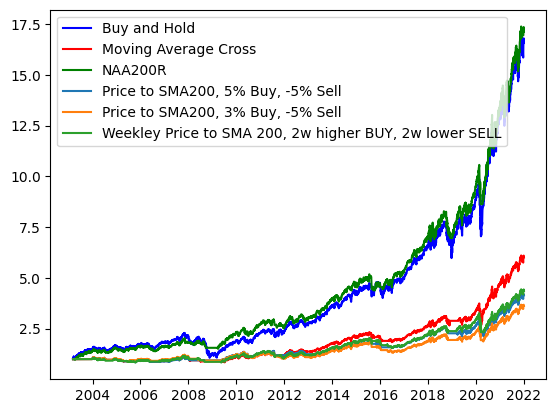

In [12]:
backtestAll(qqq, test_start, test_end)

Backtest for QLD

        
        Performance Summary of Buy and Hold: 
        cumulative return:3842.75%, 
        sharp_ratio: 4.83%, 
        max_drawdown: -81.23%, 
        average of daily return:0.1312%, 
        std of daily return: 2.7178%,
        number of trades: 2
        
        

        
        Performance Summary of MA Crossing, 50, 200: 
        cumulative return:1605.10%, 
        sharp_ratio: 4.55%, 
        max_drawdown: -51.72%, 
        average of daily return:0.0942%, 
        std of daily return: 2.0683%,
        number of trades: 11
        
        

        
        Performance Summary of NAA200R, 15, 30: 
        cumulative return:9054.57%, 
        sharp_ratio: 6.68%, 
        max_drawdown: -41.96%, 
        average of daily return:0.1367%, 
        std of daily return: 2.0471%,
        number of trades: 32
        
        

        
        Performance Summary of Price to SMA 200, 5% BUY, -5% SELL: 
        cumulative return:1754.88%, 
        sharp_r

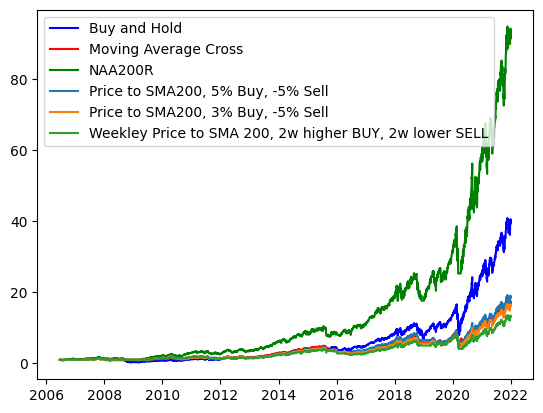

In [13]:
backtestAll(qld, test_start, test_end)

Backtest for TQQQ

        
        Performance Summary of Buy and Hold: 
        cumulative return:19126.59%, 
        sharp_ratio: 6.69%, 
        max_drawdown: -69.92%, 
        average of daily return:0.2429%, 
        std of daily return: 3.6325%,
        number of trades: 2
        
        

        
        Performance Summary of MA Crossing, 50, 200: 
        cumulative return:1220.05%, 
        sharp_ratio: 4.35%, 
        max_drawdown: -69.92%, 
        average of daily return:0.1363%, 
        std of daily return: 3.1323%,
        number of trades: 8
        
        

        
        Performance Summary of NAA200R, 15, 30: 
        cumulative return:15238.09%, 
        sharp_ratio: 7.06%, 
        max_drawdown: -48.14%, 
        average of daily return:0.2154%, 
        std of daily return: 3.0514%,
        number of trades: 21
        
        

        
        Performance Summary of Price to SMA 200, 5% BUY, -5% SELL: 
        cumulative return:3489.62%, 
        sharp

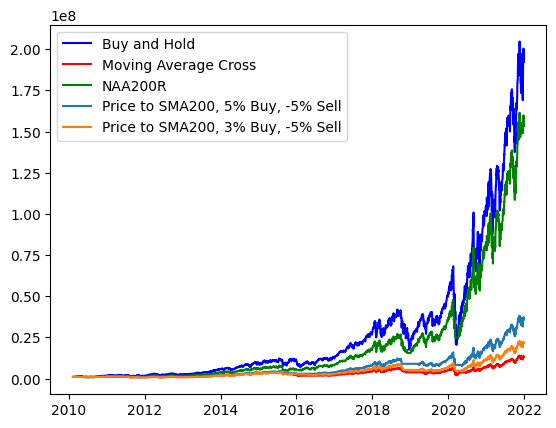

In [8]:
backtestAll(tqqq, test_start, test_end)

Backtest for SPY

        
        Performance Summary of Buy and Hold: 
        cumulative return:227.72%, 
        sharp_ratio: 3.25%, 
        max_drawdown: -52.39%, 
        average of daily return:0.0420%, 
        std of daily return: 1.2927%,
        number of trades: 2
        
        

        
        Performance Summary of MA Crossing, 50, 200: 
        cumulative return:185.73%, 
        sharp_ratio: 3.84%, 
        max_drawdown: -34.10%, 
        average of daily return:0.0337%, 
        std of daily return: 0.8764%,
        number of trades: 8
        
        

        
        Performance Summary of NAA200R, 15, 30: 
        cumulative return:309.17%, 
        sharp_ratio: 4.94%, 
        max_drawdown: -19.24%, 
        average of daily return:0.0440%, 
        std of daily return: 0.8900%,
        number of trades: 28
        
        

        
        Performance Summary of Price to SMA 200, 5% BUY, -5% SELL: 
        cumulative return:182.22%, 
        sharp_ratio:

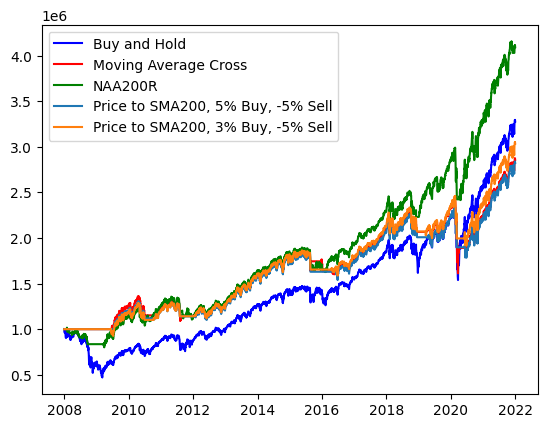

In [9]:
backtestAll(spy, test_start, test_end)

[[datetime.datetime(2000, 1, 1, 0, 0), 0.4220580652080928], [datetime.datetime(2000, 1, 31, 0, 0), 0.4116515475283101], [datetime.datetime(2000, 3, 1, 0, 0), 0.34583044107505806], [datetime.datetime(2000, 3, 31, 0, 0), 0.33543378577384775], [datetime.datetime(2000, 4, 30, 0, 0), 0.3658039167815563], [datetime.datetime(2000, 5, 30, 0, 0), 0.4465741310091764], [datetime.datetime(2000, 6, 29, 0, 0), 0.40538791093883203], [datetime.datetime(2000, 7, 29, 0, 0), 0.44623340150845126], [datetime.datetime(2000, 8, 28, 0, 0), 0.3904568434971843], [datetime.datetime(2000, 9, 27, 0, 0), 0.4327703929829248], [datetime.datetime(2000, 10, 27, 0, 0), 0.48683655191897784], [datetime.datetime(2000, 11, 26, 0, 0), 0.602192264361523], [datetime.datetime(2000, 12, 26, 0, 0), 0.6800821605893865], [datetime.datetime(2001, 1, 25, 0, 0), 0.6424805988637051], [datetime.datetime(2001, 2, 24, 0, 0), 0.7890699965839625], [datetime.datetime(2001, 3, 26, 0, 0), 0.9878019105601784], [datetime.datetime(2001, 4, 25, 0,

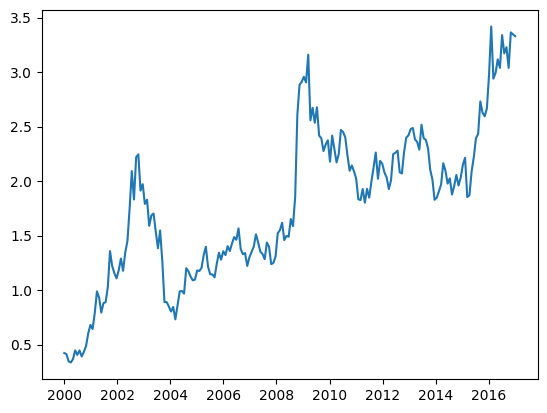

In [5]:
#backtest buy and hold strategy over 5 year periods
#starting date 30 days apart
sd = dt.datetime(2000,1,1)
ed = dt.datetime(2017,1,1)
hold_period = 365*5
delta = ed - sd
bh_result = []
for i in range(0, delta.days + 1, 30):
    sd_5y = sd + dt.timedelta(days=i)
    ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=hold_period)
    buy_and_hold_strategy = None
    buy_and_hold_strategy = ab.BuyAndHold()
    buy_and_hold_strategy.run_strategy(qqq, sd_5y, ed_5y)
    bt = None
    bt = ab.BackTest(sd_5y, ed_5y,1)
    bt.run_backtest(buy_and_hold_strategy, qqq)
    bh_result.append([sd_5y,bt.balance['Total'].iloc[-1]])

print(bh_result)
plt.plot([x[0] for x in bh_result], [x[1] for x in bh_result])



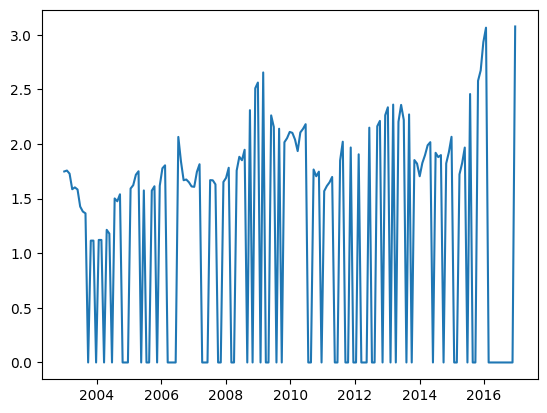

In [2]:
#backtest buy and hold strategy over 5 year periods
#starting date 30 days apart
sd = dt.datetime(2003,1,1)
ed = dt.datetime(2017,1,1)
hold_period = 365*5
delta = ed - sd
ret = []

for i in range(0, delta.days + 1, 30):

    sd_5y = sd + dt.timedelta(days=i)
    ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=hold_period)

    threshold_strategy = ab.Threshold(signal_data = naa200r, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
    threshold_strategy.run_strategy(qqq, sd_5y , ed_5y)

    naa200r_threshold_bt = ab.BackTest(sd_5y , ed_5y,1)
    naa200r_threshold_bt.run_backtest(threshold_strategy, qqq)
    ret.append([sd_5y,naa200r_threshold_bt.balance['Total'].iloc[-1]])
# print(ret)
plt.plot([x[0] for x in ret], [x[1] for x in ret])

In [13]:
import pandas as pd
df = pd.DataFrame([x[0] for x in ret if x[1]!=0], [x[1] for x in ret if x[1]!=0]).reset_index()
df.columns =['return','date']
#min(ret)

In [15]:
df.iloc[df.idxmin()]

,return,date
9,1.115588,2003-10-28
0,1.748733,2003-01-01


In [25]:
naa200r.data['Close']

Date
2022-03-01    19.012
2022-02-28    21.423
2022-02-25    20.954
2022-02-24    18.062
2022-02-23    17.167
               ...  
2002-01-03    54.946
2002-01-02    50.969
2001-12-31    50.672
2001-12-28    51.550
2001-12-27    51.331
Name: Close, Length: 5078, dtype: float64

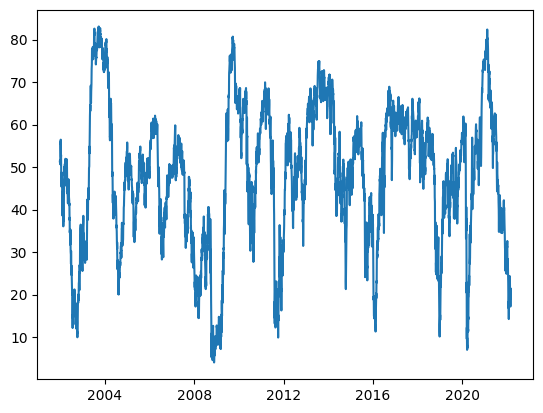

In [28]:
plt.plot(naa200r.data['Close'])

Text(0.5, 1.0, 'QQQ (NAA200R Strategy 5 yrs with Different Start Dates)')

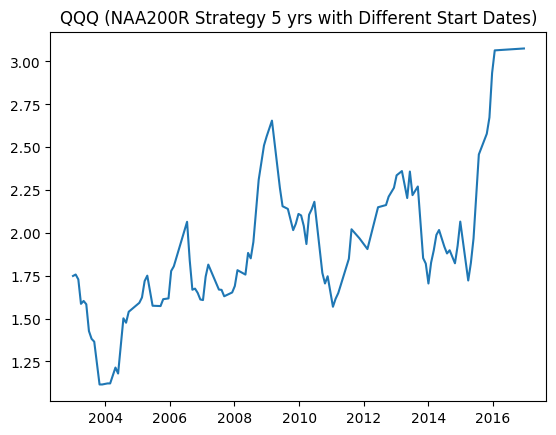

In [21]:
plt.plot([x[0] for x in ret if x[1]!=0], [x[1] for x in ret if x[1]!=0])
plt.title('QQQ (NAA200R Strategy 5 yrs with Different Start Dates)')

1.0492919032528383
0.9352035331297277
0.9492687064369058
0.8784724054522466
0.0
0.0
0.9087810258117835
0.8863865744669351
0.0
0.9821558854775899
0.9821558854775899
0.9821558854775899
0.9821558854775899


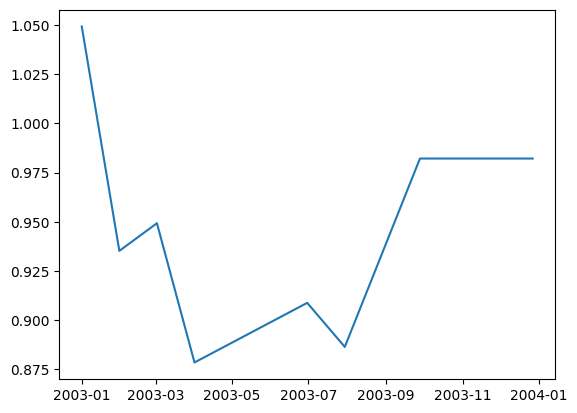

In [28]:
#backtest buy and hold strategy over 5 year periods
#starting date 30 days apart
sd = dt.datetime(2003,1,1)
ed = dt.datetime(2004,1,1)
hold_period = 365*5
delta = ed - sd
ret_ma = []

for i in range(0, delta.days + 1, 30):

    sd_5y = sd + dt.timedelta(days=i)
    ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=hold_period)

    ma_threshold = ab.MAThreshold(ma_window = 200, buy_threshold = 1.05, sell_threshold = 0.95)
    ma_threshold.run_strategy(qqq, sd_5y,ed_5y)
    ma_threshold_bt = ab.BackTest(sd_5y, ed_5y)
    ma_threshold_bt.run_backtest(ma_threshold, qqq)

    ret_ma.append([sd_5y,ma_threshold_bt.balance['Total'].iloc[-1]])
    print(ma_threshold_bt.balance['Total'].iloc[-1])
# print(ret)
plt.plot([x[0] for x in ret_ma if x[1]!=0], [x[1] for x in ret_ma if x[1]!=0])

In [4]:
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
#start_date = '2003-03-10'
#end_date = '2023-01-01'

start_date = dt.datetime(2003,3,10)
end_date = dt.datetime(2023,1,1)

ticker = 'QQQ'

period= 'max'
interval ='1d'

In [ ]:
#data = yf.Ticker(ticker).history(period= period,interval =interval,start =start_date,end = end_date,prepost=False, actions=True,auto_adjust=True, back_adjust=False,proxy=None, rounding=False, timeout=None)
#data.index = data.index.strftime('%Y-%m-%d')
#data.index = pd.to_datetime(data.index)
#data.head(1)


In [ ]:
qqq = ab.StockData(ticker)
qqq.get_data_history_from_yfinance(ticker, 'max','1d',start_date, end_date)

#qqq.get_data_from_yfinance('QQQ', sd, ed)

In [ ]:
buy_and_hold = ab.BuyAndHold()
buy_and_hold.run_strategy(qqq, start_date,end_date)

In [ ]:
buy_and_hold.trades

,Date,Ticker,Action,Price
0,2003-03-10,QQQ,BuyAll,20.645077
1,2022-12-30,QQQ,SellAll,266.279999


In [ ]:
macross_strategy = ab.MACross(50, 200)
macross_strategy.run_strategy(qqq, start_date,end_date)

In [ ]:
macross_strategy.trades.groupby('Action').max()['Date']

Action
Buy    2022-03-01
Sell   2022-12-30
Name: Date, dtype: datetime64[ns]

In [ ]:
#macross_strategy.trades

In [ ]:
bt = ab.BackTest(start_date, end_date)
bt.run_backtest(buy_and_hold, qqq)

In [ ]:
bt.balance

,Date,Cash,Stock,Total,Margin
0,2003-03-10,0.000000e+00,48437.698345,1.000000e+06,0
1,2003-03-11,0.000000e+00,48437.698345,1.000000e+06,0
2,2003-03-12,0.000000e+00,48437.698345,1.000000e+06,0
3,2003-03-13,0.000000e+00,48437.698345,1.000000e+06,0
4,2003-03-14,0.000000e+00,48437.698345,1.000000e+06,0
...,...,...,...,...,...
4985,2022-12-23,0.000000e+00,48437.698345,1.000000e+06,0
4986,2022-12-27,0.000000e+00,48437.698345,1.000000e+06,0
4987,2022-12-28,0.000000e+00,48437.698345,1.000000e+06,0
4988,2022-12-29,0.000000e+00,48437.698345,1.000000e+06,0


In [ ]:
ma_cross_bt = ab.BackTest(start_date, end_date)
ma_cross_bt.run_backtest(macross_strategy, qqq)

In [ ]:
ma_cross_bt.balance

,Date,Cash,Stock,Total,Margin
0,2003-03-10,1.000000e+06,0.0,1.000000e+06,0
1,2003-03-11,1.000000e+06,0.0,1.000000e+06,0
2,2003-03-12,1.000000e+06,0.0,1.000000e+06,0
3,2003-03-13,1.000000e+06,0.0,1.000000e+06,0
4,2003-03-14,1.000000e+06,0.0,1.000000e+06,0
...,...,...,...,...,...
4985,2022-12-23,5.757425e+06,0.0,5.757425e+06,0
4986,2022-12-27,5.757425e+06,0.0,5.757425e+06,0
4987,2022-12-28,5.757425e+06,0.0,5.757425e+06,0
4988,2022-12-29,5.757425e+06,0.0,5.757425e+06,0


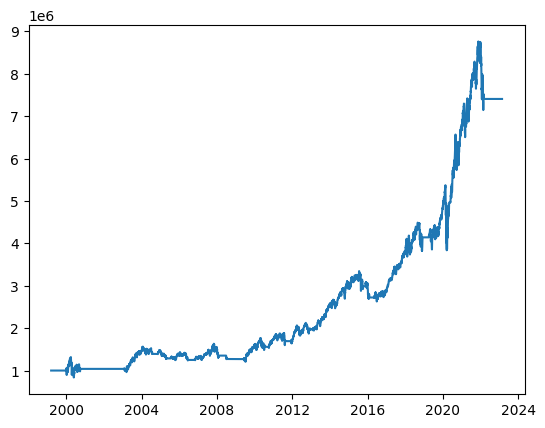

In [ ]:
#plt.plot(bt.balance['Date'], bt.balance['Total'])
plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'])
#plt.plot(qqq.data.index, qqq.data['Close'], qqq.data['ShortMA'], qqq.data['LongMA'])